# Konvektions-Diffusions-Gleichung

Wir lösen hier die Konvektions-Diffusions-Gleichung
$$ - u''(x) + \nu u'(x) =0$$
im Intervall $I=(0,1)$ zu den Randwerten $u(0)=1, u(1)=0$.



In [1]:
global nu = 100.0

In [2]:
xa = 0.0
xb = 1.0

ua= 0.0
ub= 0.0

NumCells = 16
NumPoints = NumCells +1

# Gitterweite
h = (xb-xa)/NumCells;


# Koordinaten
x = linspace(xa, xb, NumPoints);

xa = 0
xb = 1
ua = 0
ub = 0
NumCells = 16
NumPoints = 17


## Teilaufgabe a)
Die analytische Lösung ist  
$$
u(x) =\frac{\exp(\nu)- \exp(\nu x)}{exp(\nu)-1.0}.
$$
Für diese Funktion findet man
\begin{align*}
u'(x)  &= \frac{-\nu }{exp(\nu)-1.0} \cdot \exp(\nu x) \\
u''(x) &= \frac{-\nu^2 }{exp(\nu)-1.0} \cdot \exp(\nu x) = \nu u'(x) 
\end{align*}
und verifiziert zusätzlich durch Einsetzen der Randbedingungen: 
\begin{align*}
u(0) &= \frac{\exp(\nu)- \exp(0)}{exp(\nu)-1.0} = 1\\
u(1) &= \frac{\exp(\nu)- \exp(\nu)}{exp(\nu)-1.0} = 0
\end{align*}

Diese Funktion wollen wir auch darstellen:

In [3]:
referenceSolution=inline("(exp(nu)-exp(nu.*x))/(exp(nu)-1.0)")
referenceSolution(nu, 0.0)
referenceSolution(nu, 1.0)

referenceSolution =

  <class inline>

ans = 1
ans = 0


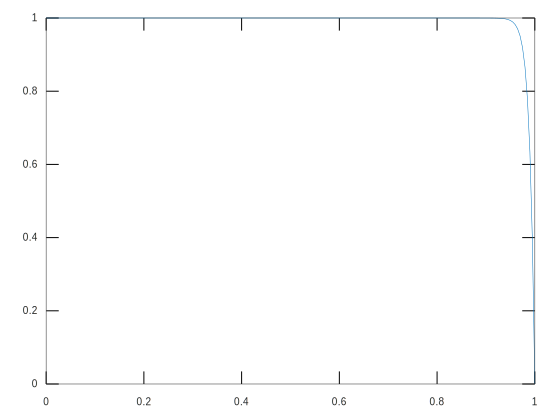

In [26]:
%plot -f svg
myx=linspace(0.0, 1.0, 200);
plot(myx, referenceSolution(100, myx))

## Hilfsfunktionen
Wir diskretisieren in Kürze die Gleichung. Dies führt auf ein lineares Gleichungssystem:

In [5]:
A = zeros(NumPoints);
b = zeros(NumPoints,1);
u = zeros(NumPoints,1);

Um die Matrix zu schreiben, verwenden wir eine Hilfsfunktion `init_matrix`. Neben der Anzahl der Gitterpunkte bekommt als Eingabe einen Matrixstern `stencil`:

In [6]:
%writefile init_matrix.m
function A=init_matrix(NumPoints, stencil)
A=zeros(NumPoints);
for i=1:NumPoints
    if (i>1) A(i,i-1) = stencil(1); end
    A(i,i) = stencil(2);
    if (i<NumPoints) A(i,i+1) = stencil(3); end
end
endfunction


Hier das Anwendungsbeispiel:

In [7]:
A = init_matrix(NumPoints, [-1 9 -1])

A =

   9  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  -1   9  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  -1   9  -1   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  -1   9  -1   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0  -1   9  -1   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  -1   9  -1   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  -1   9  -1   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  -1   9  -1   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  -1   9  -1   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  -1   9  -1   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  -1   9  -1   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  -1   9  -1   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  -1   9  -1   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  -1   9  -1   0   0
   0   0   0   0   0   0   0 

Das Setzen der Dirichlet-Randwerte erledigt folgende Funktion:

In [8]:
function [A,b] = set_dirichlet(i, ui, A, b)
    b(i) = ui;
    A(i,:) = 0;
    A(i,i) = 1;
endfunction

Den Diskretisierungsfehler berechnen wir ebenfalls mit einer kleinen Funktion:

In [9]:
function [h, err]=discretization_error(NumPoints, stencilDiff, stencilConv, nu)

    
    # Gitterweite
    h = 1.0/(NumPoints-1);
   
    # Koordinaten
    x = linspace(0.0, 1.0, NumPoints);
    
    A = zeros(NumPoints);
    b = zeros(NumPoints,1);
    u = zeros(NumPoints,1);
    
    # LGS
    stencilh = (1.0/(h*h))*stencilDiff + nu*stencilConv/h;
    
    A = init_matrix(NumPoints, stencilh);
    b = zeros(NumPoints,1); 
    [A,b] = set_dirichlet(1, 1.0, A, b);
    [A,b] = set_dirichlet(NumPoints, 0.0, A, b);
    
    tic()
    u = linsolve(A,b);
    toc()
    plot(x, u)
    
    sol = (exp(nu)-exp(nu.*x))/(exp(nu)-1.0); 
    err=norm(u(:)-sol(:), inf);
  
    #plot(xcoord, sol)
endfunction



## Teilaufgabe b): Zentrale Differenzen

In [10]:
stencilDiff = [-1 2 -1]
stencilConvCentral = 0.5*[-1 0 1]

stencilDiff =

  -1   2  -1

stencilConvCentral =

  -0.5000        0   0.5000



Elapsed time is 0.00104499 seconds.
Elapsed time is 0.000125885 seconds.
Elapsed time is 0.000264883 seconds.
Elapsed time is 0.000363827 seconds.
Elapsed time is 0.000922203 seconds.
Elapsed time is 0.00316691 seconds.
Elapsed time is 0.00970507 seconds.
Elapsed time is 0.047533 seconds.
Elapsed time is 0.252015 seconds.
hGrid =

 Columns 1 through 6:

   1.0000e-01   5.0000e-02   2.5000e-02   1.2500e-02   6.2500e-03   3.1250e-03

 Columns 7 through 9:

   1.5625e-03   7.8125e-04   3.9063e-04

herrC =

 Columns 1 through 6:

   6.9612e-01   4.3531e-01   1.9320e-01   5.5736e-02   1.2128e-02   3.0205e-03

 Columns 7 through 9:

   7.4896e-04   1.8721e-04   4.6780e-05



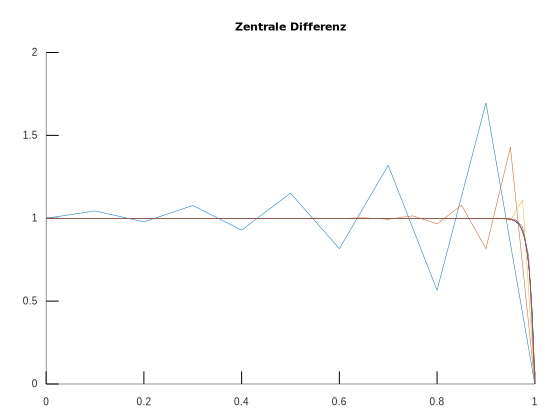

In [11]:
title("Zentrale Differenz")
hold on
for k=1:9
    [hGrid(k), herrC(k)] = discretization_error(5*2**k+1, stencilDiff, stencilConvCentral, nu);
endfor 
hold off
hGrid
herrC

## Teilaufgabe c): Linksseitige Differenzen

In [12]:
stencilConvUp = [-1 1 0]

stencilConvUp =

  -1   1   0



Elapsed time is 0.000310898 seconds.
Elapsed time is 0.000124931 seconds.
Elapsed time is 0.00439501 seconds.
Elapsed time is 0.000360966 seconds.
Elapsed time is 0.000823021 seconds.
Elapsed time is 0.0031898 seconds.
Elapsed time is 0.0161879 seconds.
Elapsed time is 0.050462 seconds.
Elapsed time is 0.299222 seconds.
herrUp =

 Columns 1 through 6:

   9.0864e-02   1.5993e-01   2.0363e-01   1.5794e-01   9.2193e-02   5.0679e-02

 Columns 7 through 9:

   2.6983e-02   1.3922e-02   7.0706e-03



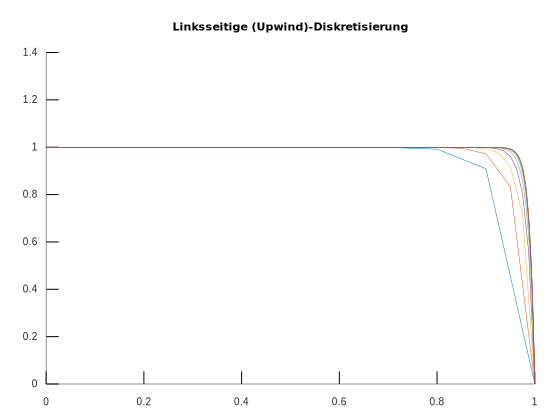

In [13]:
title("Linksseitige (Upwind)-Diskretisierung")
hold on
for k=1:9
    [h(k), herrUp(k)] = discretization_error(5*2**k+1, stencilDiff, stencilConvUp, nu);
endfor 
herrUp

## Teilaufgabe d): Rechtsseitige Differenzen

In [14]:
stencilConvDown = [0 -1 1]

stencilConvDown =

   0  -1   1



Elapsed time is 0.00019598 seconds.
Elapsed time is 0.000113964 seconds.
Elapsed time is 0.000319004 seconds.
Elapsed time is 0.000443935 seconds.
Elapsed time is 0.000684977 seconds.
Elapsed time is 0.00587106 seconds.
Elapsed time is 0.00792408 seconds.
Elapsed time is 0.0532241 seconds.
Elapsed time is 0.249793 seconds.


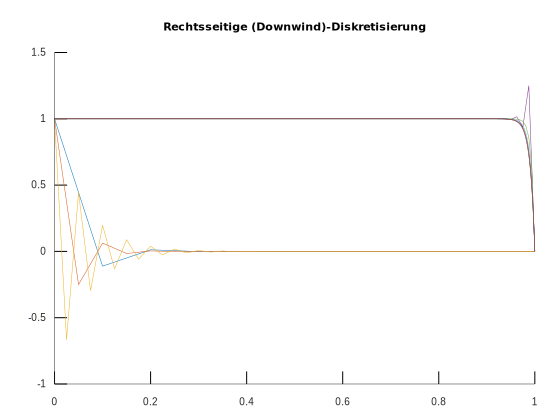

In [15]:
title("Rechtsseitige (Downwind)-Diskretisierung")
hold on
for k=1:9
    [h(k), herrDown(k)] = discretization_error(5*2**k+1, stencilDiff, stencilConvDown, nu);
endfor 


## Teilaufgabe e): Darstellung der Fehler im Diagramm
Wir stellen den Fehler (in doppelt logarithmischer Skalierung) dar. Die zentrale Differenz zeigt dabei Konvergenz 2. Ordnung. Die rechts- bzw. linksseitige Differenz ist lediglich 1. Ordnung. Für $nu>0$ ist die linksseitige Differenz jedoch stabil.

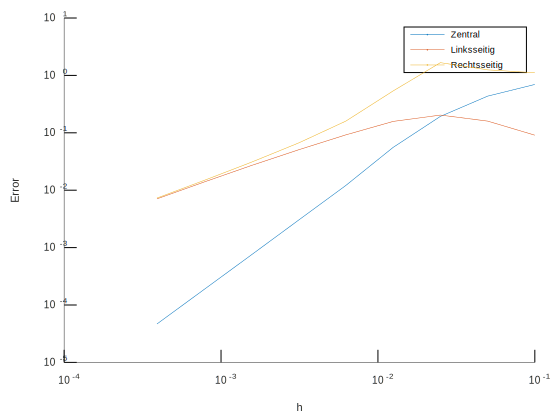

In [16]:
hold on

xlabel("h")
ylabel("Error")

loglog(h,herrC)
loglog(h,herrUp)
loglog(h,herrDown)
legend ({"Zentral", "Linksseitig", "Rechtsseitig"});

hold off

## Teilaufgabe f): Vorzeichen von $\nu$ und Instabilitäten
Die Diskretisierungssterne für linksseitige, zentrale und rechtsseitige Differenzen sind: 

 
 \begin{align*}
 \frac{1}{h^2}\begin{bmatrix}-1 &2 &-1\end{bmatrix} + \frac{\nu}{h} \begin{bmatrix}-1 &1 & 0\end{bmatrix}\\
 \frac{1}{h^2}\begin{bmatrix}-1 &2 &-1\end{bmatrix} + \frac{\nu}{2h} \begin{bmatrix}-1 &0 & 1\end{bmatrix}\\
 \frac{1}{h^2}\begin{bmatrix}-1 &2 &-1\end{bmatrix} + \frac{\nu}{h} \begin{bmatrix} 0&-1 & 1\end{bmatrix}\\
 \end{align*}
Konkret ergibt sich für $h=1/5, \nu=100$:


In [17]:
h=1/5
1.0/(h*h)*stencilDiff + 100.0/h*stencilConvUp
1.0/(h*h)*stencilDiff + 100.0/h*stencilConvCentral
1.0/(h*h)*stencilDiff + 100.0/h*stencilConvDown

h = 0.2000
ans =

  -525.000   550.000   -25.000

ans =

  -275.000    50.000   225.000

ans =

   -25.000  -450.000   475.000



In den Beispielen oben ergeben sich teilweise Oszillationen, die Verfahren werden also instabil. Die Stabilität hängt vom Produkt $\nu\cdot h$ ab. Für $h \rightarrow 0$ dominiert der Diffusionsterm und alle Verfahren werden stabil. Falls $h$ jedoch groß ist, so treten Probleme auf: 

* Falls $\nu h\gg 1$ (und die Strömung also von links nach rechts geht), so ist lediglich die linksseitige Differenz stabil.
* Falls $\nu h\ll 1$ (und die Strömung also von rechts nach links geht), so ist rechtsseitige Differenz stabil.
* Die zentrale Differenz ist in jedem Fall instabil.

Die Stabilität hängt mit der Diagonaldominanz der Matrix zusammen. Falls $a_{ii} \ge \sum_{j\neq i}|a_{ij}|$, so ist die Diskretitsierung stabil.
